In [2]:
from polygonsoup import geom, plotters, plut
import matplotlib.pyplot as plt
import numpy as np 

Create a circle with a width profile

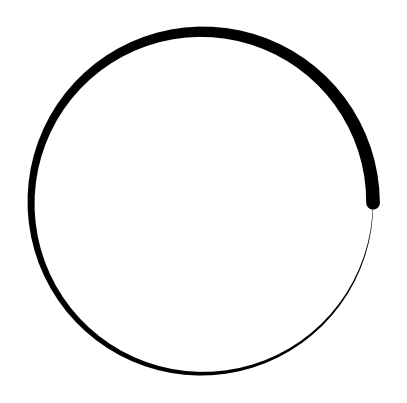

In [17]:
# Creates a sampled circle
P = geom.shapes.circle([0, 0], 100)
# Add an arbitrary width profile
Pw = np.hstack([P, np.linspace(0.1, 4, len(P)).reshape(-1,1)])
# Stroke it to show
filled = geom.thick_curve(Pw)
plt.figure(figsize=(5,5))
plut.fill(filled, 'k')
plut.setup()
plt.show()


Convert it to millimeters

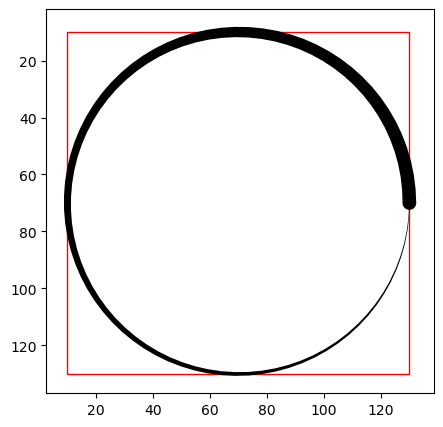

In [18]:
src_rect = geom.bounding_box(Pw[:,:2])
dest_rect_mm = geom.make_rect(10, 10, 120, 120)
mat = geom.rect_in_rect_transform(src_rect, dest_rect_mm)
Pw_mm = np.array(Pw)
Pw_mm[:,:2] = geom.tsm(mat, Pw[:,:2])
Pw_mm[:,2] *= np.sqrt(geom.det22(mat))

filled = geom.thick_curve(Pw_mm)
plt.figure(figsize=(5,5))
plut.stroke_rect(dest_rect_mm, 'r')
plut.fill(filled, 'k')
plut.setup(axis=True)
plt.show()

Convert width to Z position, increasing Z is higher pressure

In [19]:
wrange_mm = np.array([0.0, 5.0])
z0 = 2.3 # Down thinnest
depth = 5.7 # Allowed amount of movement along z 
zrange_mm = [z0, z0+depth]

def remap(x, input_range, output_range):
    return np.interp(x, input_range, output_range, left=output_range[0], right=output_range[1])

def width_to_z(r):
    return remap(r, wrange_mm, zrange_mm)

def z_to_width(z):
    return remap(z, zrange_mm, wrange_mm)

input_paths = [Pw_mm]
plotter_paths = []
for path in input_paths:
    path = np.array(path)
    path[:,2] = width_to_z(path[:,2])
    plotter_paths.append(path)

Try to plot. You want to start the server from "server" with `python idraw_server.py' in a terminal before doing this. 

This will home the plotter, not always useful but good for testing:

In [20]:
with plotters.PlotterClient() as cli:
    cli.home()

Closing socket


This should draw the paths

In [21]:
with plotters.PlotterClient() as cli:
    cli.feedrate(1700)
    cli.draw_paths(plotter_paths)


sending path 
[[129.98813979  70.           2.36841352]
 [129.79843263  74.7679525    2.40218729]
 [129.23051054  79.50576047   2.43596105]
 [128.28796411  84.18346996   2.46973482]
 [126.97675243  88.77150699   2.50350858]
 [125.30516539  93.24086451   2.53728235]
 [123.2837713   97.56328579   2.57105611]
 [120.92535007 101.71144312   2.60482988]
 [118.2448124  105.65911048   2.63860364]
 [115.2591055  109.38132947   2.67237741]
 [111.98710599 112.85456702   2.70615117]
 [108.44950049 116.05686419   2.73992493]
 [104.66865489 118.96797504   2.7736987 ]
 [100.66847291 121.56949459   2.80747246]
 [ 96.47424498 123.84497519   2.84124623]
 [ 92.11248837 125.78003051   2.87501999]
 [ 87.6107795  127.36242653   2.90879376]
 [ 82.99757964 128.58215881   2.94256752]
 [ 78.30205491 129.43151583   2.97634129]
 [ 73.55389193 129.90512767   3.01011505]
 [ 68.78311011 130.           3.04388882]
 [ 64.01987189 129.71553301   3.07766258]
 [ 59.29429198 129.0535252    3.11143635]
 [ 54.63624701 128.0